In [1]:
%run "cnn_classification.ipynb"

Number of images: 11788
Number of training images by default: 5994
Number of testing images by default: 5794
Number of classes: 200

Loading Augmented Images
Augmented Images Loaded

Number of images after augmentation: 29770
Number of training images after augmentation: 23976
Number of testing images: 5794



In [2]:
model = models.efficientnet_b1(weights="DEFAULT")

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
# freeze all layers for fine tuning (not doing this takes it very long to train)
for param in model.parameters():
    param.requires_grad = False

# number of inputs in last layer
num_ftrs = model.classifier[1].in_features

model.classifier[1] = nn.Linear(num_ftrs, num_out_ftrs)

# printing the last layer : classifier
print(model.classifier)

model = model.to(device)

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=200, bias=True)
)


In [5]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 256200


(6769384, 256200)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 4.04 Acc: 19.14% Time_Taken: 4m 49s
test Loss: 2.93 Acc: 37.97% Time_Taken: 0m 53s

Epoch 2/10- - - - - - - - - - 
train Loss: 3.04 Acc: 34.68% Time_Taken: 4m 13s
test Loss: 2.31 Acc: 46.93% Time_Taken: 0m 52s

Epoch 3/10- - - - - - - - - - 
train Loss: 2.71 Acc: 39.91% Time_Taken: 4m 15s
test Loss: 2.06 Acc: 49.41% Time_Taken: 0m 52s

Epoch 4/10- - - - - - - - - - 
train Loss: 2.55 Acc: 42.78% Time_Taken: 4m 16s
test Loss: 1.99 Acc: 50.41% Time_Taken: 0m 52s

Epoch 5/10- - - - - - - - - - 
train Loss: 2.42 Acc: 45.33% Time_Taken: 4m 15s
test Loss: 1.91 Acc: 51.76% Time_Taken: 0m 51s

Epoch 6/10- - - - - - - - - - 
train Loss: 2.35 Acc: 46.35% Time_Taken: 4m 16s
test Loss: 1.81 Acc: 54.14% Time_Taken: 0m 52s

Epoch 7/10- - - - - - - - - - 
train Loss: 2.28 Acc: 47.75% Time_Taken: 4m 14s
test Loss: 1.78 Acc: 54.18% Time_Taken: 0m 52s

Epoch 8/10- - - - - - - - - - 
train Loss: 2.24 Acc: 48.29% Time_Taken: 4m 14s
test Lo

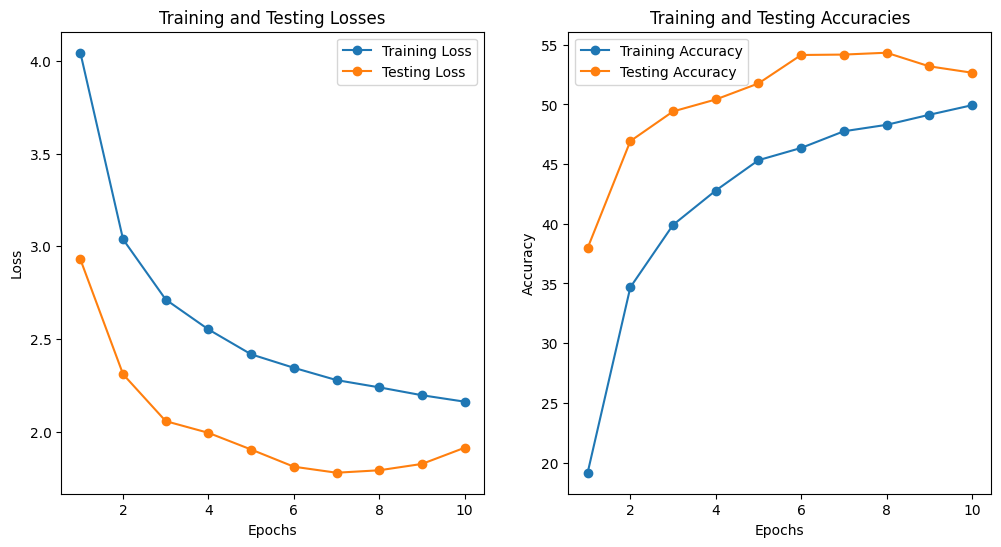

In [6]:
model, checkpoint = train_model(model, num_epoch=10)

In [7]:
for param in model.parameters():
    param.requires_grad = True

In [8]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 6769384


(6769384, 6769384)

Training Started on cuda
Epoch 1/5- - - - - - - - - - 
train Loss: 2.67 Acc: 39.15% Time_Taken: 8m 34s
test Loss: 1.71 Acc: 57.23% Time_Taken: 0m 52s

Epoch 2/5- - - - - - - - - - 
train Loss: 2.04 Acc: 51.06% Time_Taken: 8m 40s
test Loss: 1.57 Acc: 62.58% Time_Taken: 0m 52s

Epoch 3/5- - - - - - - - - - 
train Loss: 1.71 Acc: 58.15% Time_Taken: 8m 34s
test Loss: 1.61 Acc: 62.62% Time_Taken: 0m 52s

Epoch 4/5- - - - - - - - - - 
train Loss: 1.52 Acc: 62.46% Time_Taken: 8m 32s
test Loss: 1.63 Acc: 65.15% Time_Taken: 0m 52s

Epoch 5/5- - - - - - - - - - 
train Loss: 1.36 Acc: 66.36% Time_Taken: 8m 35s
test Loss: 2.11 Acc: 57.11% Time_Taken: 0m 51s

Training Finished in 42m 55s
Best Test Accuracy: 66.358025
EfficientNet_checkpoint_best_acc_66.3580__epoch_5_optim_Adam_criterion_CrossEntropyLoss


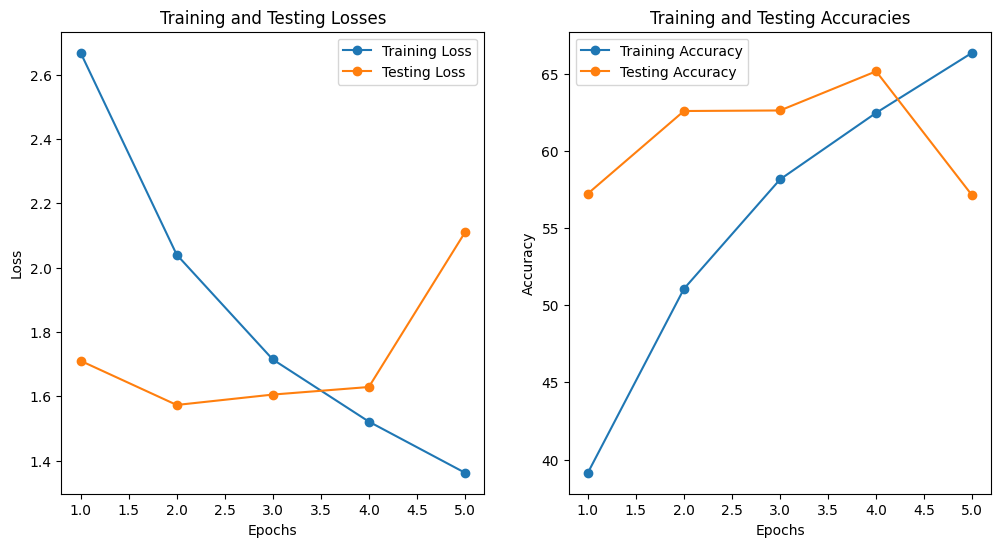

In [9]:
model, checkpoint = train_model(model, num_epoch=5, save_checkpoint=True)